Anomaly Detector Project

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['RollingMean'] = df['Temperature'].rolling(window=3).mean()
df['RollingStd'] = df['Temperature'].rolling(window=3).std()

In [26]:
filtered_df = df.dropna()
threshold = 1
anomalies = filtered_df[
    (filtered_df['Temperature'] > filtered_df['RollingMean'] + threshold * filtered_df['RollingStd']) |
    (filtered_df['Temperature'] < filtered_df['RollingMean'] - threshold * filtered_df['RollingStd'])
]
print(anomalies)

         Date  Temperature  RollingMean  RollingStd
2  2025-10-21         29.0    27.866667    1.001665
3  2025-10-22         35.2    30.566667    4.082075
7  2025-10-26         32.5    29.500000    2.600000
10 2025-10-29         31.2    28.533333    2.318045
13 2025-11-01         33.9    30.333333    3.231615


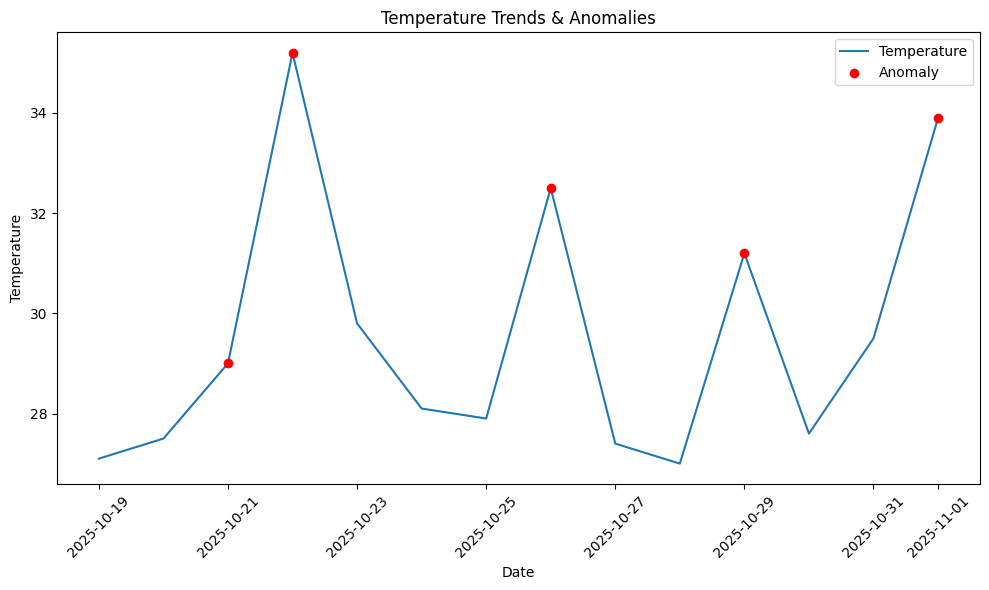

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Temperature'], label='Temperature')
plt.scatter(anomalies['Date'], anomalies['Temperature'], color='red', label='Anomaly', zorder=5)
plt.legend()
plt.title('Temperature Trends & Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()